In [9]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

In [2]:
img_path = "../output_videos/cropped_player.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # conversion to rgb

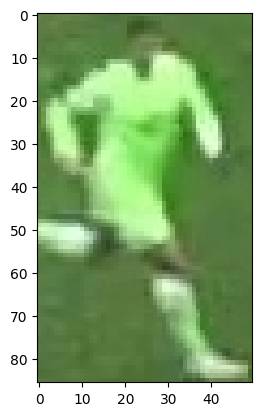

In [5]:
plt.imshow(image)
plt.show()

we can see that the player's kit that we will extract the color from mainly , is on the top half of the image

# ROI:

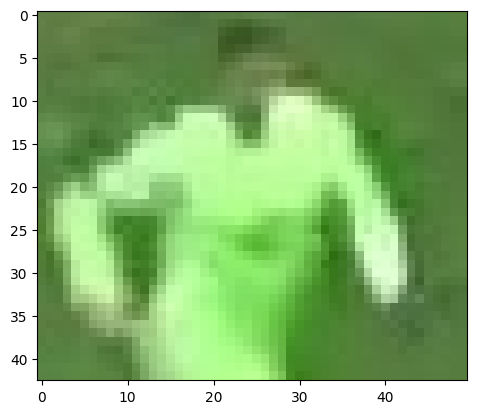

In [8]:
top_half_img = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_img)
plt.show()

issue now is there's too much grass , the pitch's astroturf should be removed

# Clustering:

c:\Users\xelor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


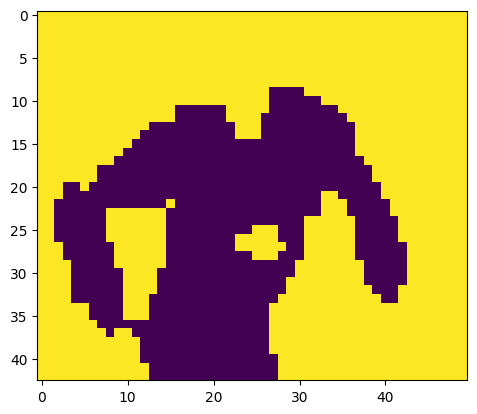

In [11]:
# clustering img to 2 clusters (one for kit of player,  one for kit )

# reshape to 2D array
image_2D = top_half_img.reshape(-1,3)

# performing k-means for 2 clusters
k_means = KMeans(n_clusters=2, random_state=0)
k_means.fit(image_2D)

# get the cluster labels
labels = k_means.labels_

# reshape the labels in to the original img shape 
clustered_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

# display
plt.imshow(clustered_img)
plt.show()

the turf is now yellow , kit color is purple

In [13]:
# logic behind this is : 
# if all corners are from the same cluster(background color), then it's most probably the background
# extract the cluster labels of the four corners
corner_clusters = [
    clustered_img[0, 0],      # top-left
    clustered_img[0, -1],     # top-right
    clustered_img[-1, 0],     # bottom-left
    clustered_img[-1, -1]     # bottom-right
]

# the dominant cluster in the corners
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

print(f"The cluster representing the background is: {non_player_cluster}")

The cluster representing the background is: 1


In [15]:
player_cluster = 1 - non_player_cluster
print(f"The cluster representing the players is: {player_cluster}")

The cluster representing the players is: 0


In [16]:
k_means.cluster_centers_[player_cluster] # RGB values 

array([171.1701847 , 235.37862797, 142.83641161])

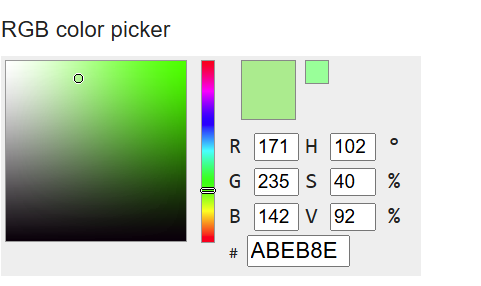

we can see that the color is a soft green just like the original img